# Topic 1 Overview of Machine Learning and Tensorflow

In [0]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())

tf.test.gpu_device_name()

Version:  1.15.2
Eager mode:  False


'/device:GPU:0'

# Topic 2 Basic Tensorflow Operations

## Tensor and Constant

In [0]:
a = tf.constant(4,dtype=tf.float32)
b = tf.constant(5.6,dtype=tf.float32)
c = a*b
print(c)

tf.Tensor(22.4, shape=(), dtype=float32)


In [0]:
c.numpy()

22.4

In [0]:
print(c)

tf.Tensor(22.4, shape=(), dtype=float32)


In [0]:
print(a)

tf.Tensor(4.0, shape=(), dtype=float32)


In [0]:
a = tf.constant(4)
b = tf.constant(5.6)
print(a*b) #this doesn't work because each element in tensor must have same data type. https://www.tensorflow.org/guide/tensor

InvalidArgumentError: ignored

In [0]:
a = tf.constant(4)
print(a)

tf.Tensor(4, shape=(), dtype=int32)


In [0]:
a = tf.constant([1,5])
a.numpy()

array([1, 5], dtype=int32)

In [0]:
a = tf.constant([1,5.0]) #tensor flow does casting
print(a)

tf.Tensor([1. 5.], shape=(2,), dtype=float32)


In [0]:
#overflow
a = tf.constant(255,dtype=tf.uint8)
c = a+1
print(a)
print(c)

tf.Tensor(255, shape=(), dtype=uint8)
tf.Tensor(0, shape=(), dtype=uint8)


## Matrix

In [0]:
a = tf.constant([[1,2],[3,4]])
b = tf.constant([[5,6],[7,8]])
c = tf.matmul(a,b)
print(c)

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [0]:
c.numpy()

array([[19, 22],
       [43, 50]], dtype=int32)

In [0]:
d=tf.multiply(a,b)
print(d)

tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32)


## Exercise: Matrix

In [0]:
x = tf.constant([[1.1,1.2]],dtype=tf.float32)
w = tf.constant([[1,2],[3,4]],dtype=tf.float32)
b = tf.constant([[2.3,2.5]],dtype=tf.float32)
y = tf.matmul(x,w)+b


## Variable

In [0]:
x = tf.Variable(0)
x = tf.Variable(tf.zeros((2,2))) # 2 by 2 matrix, populated by zero
x

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

## Graph Mode

In [0]:
W = tf.Variable(tf.ones((2,2)),dtype=tf.float32)
b = tf.Variable(tf.zeros((1,2)),dtype=tf.float32)

@tf.function
def nn(x):
  y = tf.matmul(x,W)+b
  return tf.nn.relu(y)


In [0]:
x = tf.constant([[1,0]],dtype=tf.float32)
y = nn(x)
y.numpy()

array([[1., 1.]], dtype=float32)

## Gradient

In [0]:
x = tf.Variable(2.0)

@tf.function
def f(x):
  return x*x*x

In [0]:
with tf.GradientTape() as g:  # context manager
 y = f(x)
dy_dx = g.gradient(y,x)
dy_dx.numpy()

12.0

# Topic 3 Datasets

## MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
print(y_train[0:5]) #check with images later

[5 0 4 1 9]


In [0]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

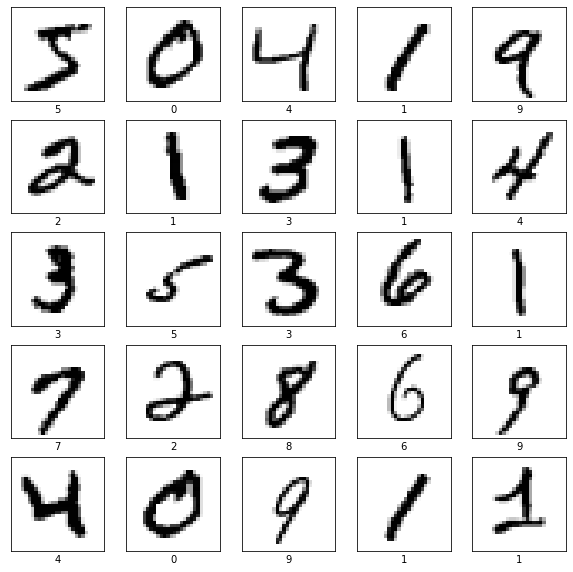

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

#### One Hot Encoding

In [0]:
from keras.utils import to_categorical
y_train,y_test = to_categorical(y_train), to_categorical(y_test)

In [0]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_train.shape

(60000, 10)

## Fashion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
print(y_train[0:5]) #label encoded

[[6]
 [9]
 [9]
 [4]
 [1]]


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

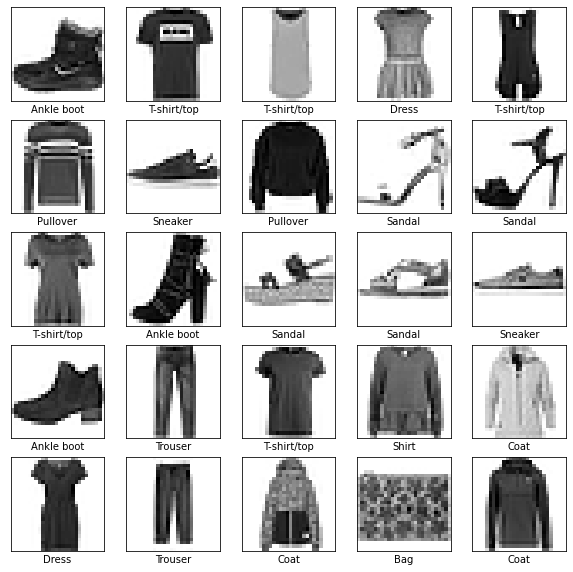

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## CIFAR dataset

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [0]:
print(y_train[0:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

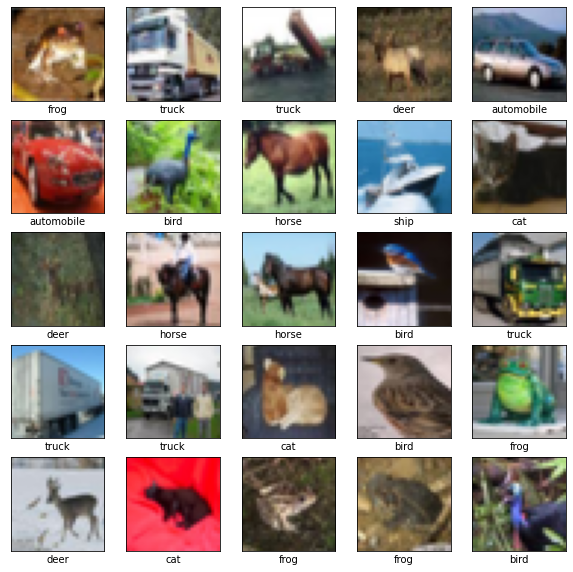

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## IMDB Dataset

In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 20000
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print(x_train[0])
print("length of x_train[0]", len(x_train[0]))


print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19

In [0]:
dt = imdb.load_data()
dt

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [0]:
print(x_train[0])
print("length of x_train[0]", len(x_train[0])) #truncate by taking the last 80 elements.

[   15   256     4     2     7  3766     5   723    36    71    43   530
   476    26   400   317    46     7     4 12118  1029    13   104    88
     4   381    15   297    98    32  2071    56    26   141     6   194
  7486    18     4   226    22    21   134   476    26   480     5   144
    30  5535    18    51    36    28   224    92    25   104     4   226
    65    16    38  1334    88    12    16   283     5    16  4472   113
   103    32    15    16  5345    19   178    32]
length of x_train[0] 80


# Topic 4 Neural Networks for Regression

### Prepare the data

In [0]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"                     
dataset = pd.read_csv(dataset_path)
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [0]:
dataset = dataset.dropna()

In [0]:
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

In [0]:
y_train = x_train.pop('medv')
y_test = x_test.pop('medv')

In [0]:
#x_train = (x_train - x_train.mean())/(x_train.max()-x_train.min()) # minmax scaler
#x_test = (x_test - x_test.mean())/(x_test.max()-x_test.min()) #not a good practice, should use train set parameters

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test) #min-max scale on x_test, but use the parameters from x_train
x_train_scaled

array([[6.53949312e-04, 0.00000000e+00, 9.25925926e-02, ...,
        4.57446809e-01, 9.44991124e-01, 1.54801325e-01],
       [1.03670187e-01, 0.00000000e+00, 6.42962963e-01, ...,
        8.08510638e-01, 9.22013695e-01, 2.15231788e-01],
       [1.18234665e-03, 0.00000000e+00, 4.87037037e-01, ...,
        4.04255319e-01, 9.91985798e-01, 2.41997792e-01],
       ...,
       [3.60470169e-04, 2.63157895e-01, 1.52592593e-01, ...,
        6.80851064e-01, 1.00000000e+00, 9.82339956e-02],
       [4.52526629e-04, 3.47368421e-01, 5.33333333e-02, ...,
        6.17021277e-01, 1.00000000e+00, 1.60044150e-01],
       [7.35608675e-03, 2.10526316e-01, 1.19629630e-01, ...,
        4.25531915e-02, 9.65483135e-01, 1.67218543e-01]])

### Build the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[len(x_train.keys())]))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

In [0]:
print([x_train.keys()])

[Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')]


In [0]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001) # RMSprop: Divide the gradient by a running average of its recent magnitude; Refer to keras doc. learning rate is parameter.
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse']) #mae: mean absolute error; #mse: mean squared error;

In [0]:
model.summary() # (13+1)*64=896; 64*64+64=4160 (64 bias terms); 64+1 (bias term) = 65

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = Sequential([
    Dense(64,activation='relu',input_shape=[len(x_train.keys())]),
    Dense(64,activation='relu'),
    Dense(1,activation='linear')
])

In [0]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Visualize the Model

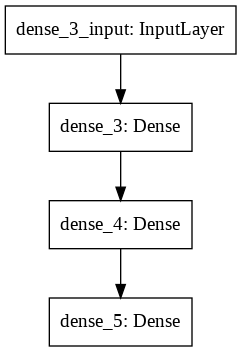

In [0]:
keras.utils.plot_model(model, 'my_first_model.png')

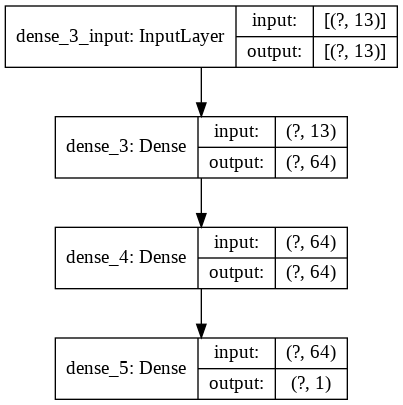

In [0]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

### Train the model

In [0]:
EPOCHS = 100
history = model.fit(x_train, y_train,epochs=EPOCHS,shuffle=True, validation_data=(x_test,y_test))

Train on 354 samples, validate on 152 samples
Epoch 1/100
354/354 [==============================] - 1s 2ms/sample - loss: 360.8891 - mae: 11.3595 - mse: 360.8891 - val_loss: 137.5016 - val_mae: 10.2215 - val_mse: 137.5016
Epoch 2/100
354/354 [==============================] - 0s 194us/sample - loss: 104.2857 - mae: 7.8069 - mse: 104.2858 - val_loss: 154.2015 - val_mae: 9.2942 - val_mse: 154.2015
Epoch 3/100
354/354 [==============================] - 0s 251us/sample - loss: 110.2254 - mae: 8.2134 - mse: 110.2254 - val_loss: 190.3693 - val_mae: 10.4268 - val_mse: 190.3693
Epoch 4/100
354/354 [==============================] - 0s 201us/sample - loss: 97.9726 - mae: 7.6095 - mse: 97.9726 - val_loss: 104.2913 - val_mae: 7.3125 - val_mse: 104.2913
Epoch 5/100
354/354 [==============================] - 0s 200us/sample - loss: 91.4742 - mae: 7.5186 - mse: 91.4741 - val_loss: 150.2147 - val_mae: 9.1745 - val_mse: 150.2147
Epoch 6/100
354/354 [==============================] - 0s 205us/sample -

### Evaluate the model

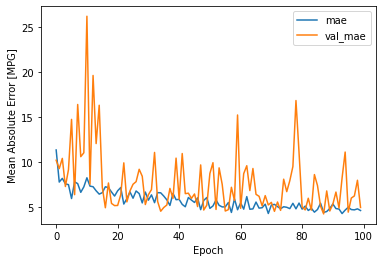

In [0]:
mae = history.history['mae']
val_mae = history.history['val_mae'] #validation_mae, in this case, it is test data.
epoch = range(len(mae))

import matplotlib.pyplot as plt

plt.plot(epoch,mae,label='mae')
plt.plot(epoch,val_mae,label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [MPG]')
plt.legend()
plt.show()

In [0]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
print("Testing Mean Abs Error: {:5.2f}".format(mae))

152/152 - 0s - loss: 40.5776 - mae: 4.9928 - mse: 40.5776
Testing Mean Abs Error:  4.99


### Make Prediction

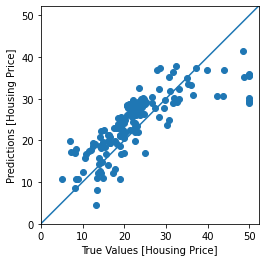

In [0]:
y_hat = model.predict(x_test).flatten()

plt.scatter(y_test, y_hat)
plt.xlabel('True Values [Housing Price]')
plt.ylabel('Predictions [Housing Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([0, 100], [0, 100])




```
# This is formatted as code
```

### Save the Model in HDF5 Format

In [0]:
model.save("regression.h5")

### Load the Model

In [0]:
new_model = keras.models.load_model('regression.h5')
new_model.summary()

### Save the Model in SavedModel Format

In [0]:
model.save("regression/1/")

INFO:tensorflow:Assets written to: regression/1/assets


In [0]:
new_model = keras.models.load_model('regression/1/')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Save and Load Weights

In [0]:
# Save the weights
model.save_weights('./regression/1/w')

# Restore the weights
model.load_weights('./regression/1/w)


SyntaxError: ignored

### Exercise: Predictive Regression Model

In [0]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
                     
dataset = pd.read_csv(dataset_path)
dataset

ERROR! Session/line number was not unique in database. History logging moved to new session 59


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
dataset = dataset.dropna()
dataset.pop('Name')
dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [0]:
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

In [0]:
y_train = x_train.pop('SepalWidth')
y_test = x_test.pop('SepalWidth')

In [0]:
x_train = (x_train - x_train.mean())/(x_train.max()-x_train.min())
x_test = (x_test - x_test.mean())/(x_test.max()-x_test.min())

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[len(x_train.keys())]))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

In [0]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


In [0]:
EPOCHS = 100
history = model.fit(x_train, y_train,epochs=EPOCHS,shuffle=True, validation_data=(x_test,y_test))

Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 [==============================] - 1s 6ms/sample - loss: 8.8830 - mae: 2.9496 - mse: 8.8830 - val_loss: 8.6016 - val_mae: 2.9045 - val_mse: 8.6016
Epoch 2/100
105/105 [==============================] - 0s 338us/sample - loss: 8.0565 - mae: 2.8075 - mse: 8.0565 - val_loss: 7.8236 - val_mae: 2.7686 - val_mse: 7.8236
Epoch 3/100
105/105 [==============================] - 0s 313us/sample - loss: 7.3206 - mae: 2.6749 - mse: 7.3206 - val_loss: 7.0065 - val_mae: 2.6177 - val_mse: 7.0065
Epoch 4/100
105/105 [==============================] - 0s 348us/sample - loss: 6.5051 - mae: 2.5189 - mse: 6.5051 - val_loss: 6.0687 - val_mae: 2.4313 - val_mse: 6.0687
Epoch 5/100
105/105 [==============================] - 0s 334us/sample - loss: 5.5694 - mae: 2.3255 - mse: 5.5694 - val_loss: 5.0337 - val_mae: 2.2047 - val_mse: 5.0337
Epoch 6/100
105/105 [==============================] - 0s 354us/sample - loss: 4.5607 - mae: 2.0963 - mse: 4.560

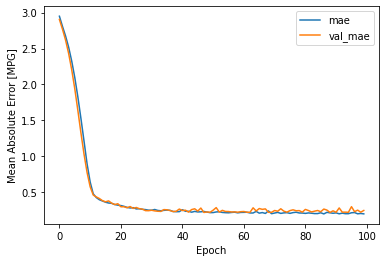

In [0]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epoch = range(len(mae))

import matplotlib.pyplot as plt

plt.plot(epoch,mae,label='mae')
plt.plot(epoch,val_mae,label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [MPG]')
plt.legend()
plt.show()

In [0]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
print("Testing Mean Abs Error: {:5.2f}".format(mae))

45/45 - 0s - loss: 0.1082 - mae: 0.2467 - mse: 0.1082
Testing Mean Abs Error:  0.25


In [0]:
y_hat = model.predict(x_test).flatten()

plt.scatter(y_test, y_hat)
plt.xlabel('True Values [Sepal Width]')
plt.ylabel('Predictions [Sepal Width]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([0, 100], [0, 100])


In [0]:
model.save("iris.h5")

# tf.saved_model.save(model, "/model_iris/1/")

In [0]:
new_model = keras.models.load_model('iris.h5')

In [0]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


# Topic 5 Neural Network for Classification

## NN Demo on MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2876 - accuracy: 0.9163 - val_loss: 0.1508 - val_accuracy: 0.9562
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1254 - accuracy: 0.9627 - val_loss: 0.1094 - val_accuracy: 0.9666
Epoch 3/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0927 - accuracy: 0.9721 - val_loss: 0.1063 - val_accuracy: 0.9683
Epoch 4/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0742 - accuracy: 0.9771 - val_loss: 0.1011 - val_accuracy: 0.9702
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0614 - accuracy: 0.9805 - val_loss: 0.0833 - val_accuracy: 0.9753
Epoch 6/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0511 - accuracy: 0.9834 - val_loss: 0.0869 - val_accuracy: 0.9735
Epoch 7/10
60000/60000 [==========================

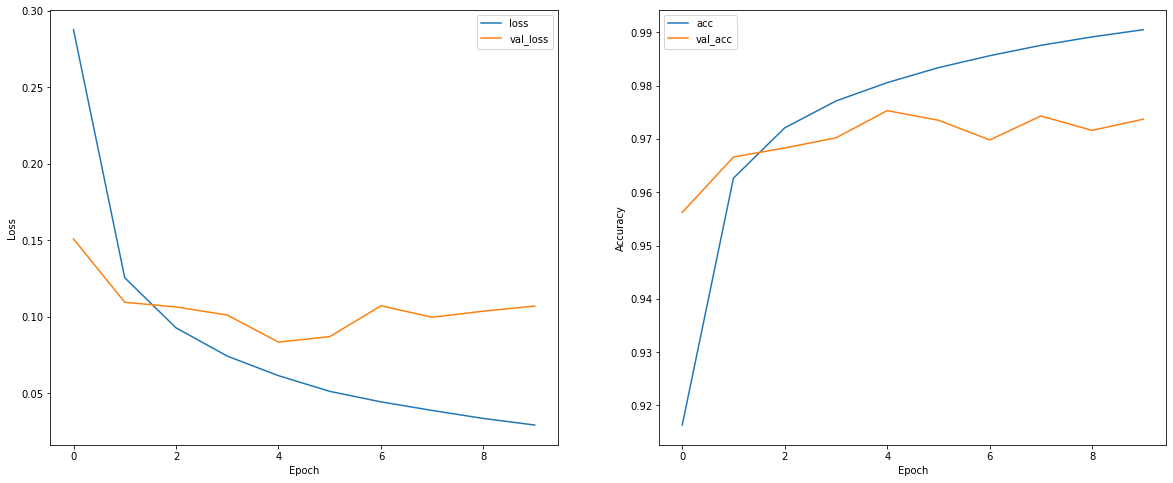

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

10000/10000 - 1s - loss: 0.1069 - accuracy: 0.9737
Accuracy: 97.37%


In [0]:
model.save("mnist.h5")

# tf.saved_model.save(model, "/model_mnist/1/")

In [0]:
new_model =keras.models.load_model('mnist.h5')

In [0]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


#### Sparse Cross Entropy vs Cross Entropy

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from keras.utils import to_categorical
y_train,y_test = to_categorical(y_train), to_categorical(y_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)), #flattens input
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2999 - accuracy: 0.9135 - val_loss: 0.1659 - val_accuracy: 0.9523
Epoch 2/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1319 - accuracy: 0.9613 - val_loss: 0.1227 - val_accuracy: 0.9625
Epoch 3/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0957 - accuracy: 0.9709 - val_loss: 0.0992 - val_accuracy: 0.9689
Epoch 4/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0768 - accuracy: 0.9764 - val_loss: 0.0924 - val_accuracy: 0.9711
Epoch 5/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0636 - accuracy: 0.9799 - val_loss: 0.0830 - val_accuracy: 0.9740
Epoch 6/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.0807 - val_accuracy: 0.9750
Epoch 7/10
60000/60000 [==========================

## Ex: Classification for Fashsion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.5035 - accuracy: 0.8212 - val_loss: 0.4253 - val_accuracy: 0.8497
Epoch 2/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3705 - accuracy: 0.8626 - val_loss: 0.3823 - val_accuracy: 0.8627
Epoch 3/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3367 - accuracy: 0.8751 - val_loss: 0.3919 - val_accuracy: 0.8569
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3135 - accuracy: 0.8839 - val_loss: 0.3642 - val_accuracy: 0.8691
Epoch 5/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2958 - accuracy: 0.8898 - val_loss: 0.3441 - val_accuracy: 0.8766
Epoch 6/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2832 - accuracy: 0.8930 - val_loss: 0.3342 - val_accuracy: 0.8816
Epoch 7/10
60000/60000 [==========================

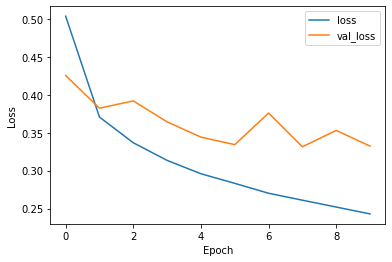

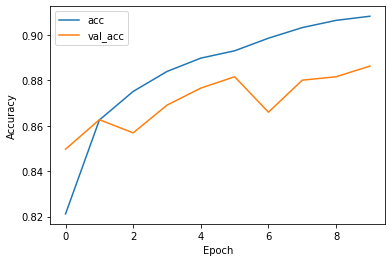

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

10000/10000 - 1s - loss: 0.3323 - accuracy: 0.8863
Accuracy: 88.63%


In [0]:
# model.save("classifcation_model_fashion_mnist.h5")

tf.saved_model.save(model, "/model_fashion_mnist/1/")

INFO:tensorflow:Assets written to: /model_fashion_mnist/1/assets


# Topic 6 Convolutional Neural Network (CNN)

## CNN on MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [0]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_28 (Dense)             (None, 10)               

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.1578 - accuracy: 0.9536 - val_loss: 0.0515 - val_accuracy: 0.9820
Epoch 2/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0500 - accuracy: 0.9849 - val_loss: 0.0481 - val_accuracy: 0.9846
Epoch 3/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0293 - val_accuracy: 0.9898
Epoch 4/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0369 - val_accuracy: 0.9870
Epoch 5/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0334 - val_accuracy: 0.9900
Epoch 6/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0346 - val_accuracy: 0.9897
Epoch 7/10
60000/60000 [====================

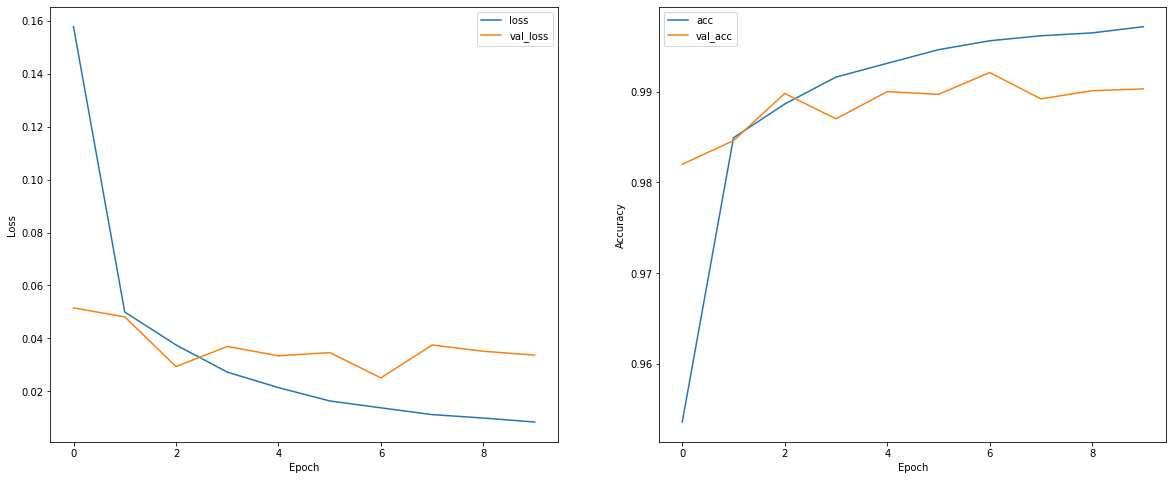

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

10000/10000 - 1s - loss: 0.0336 - accuracy: 0.9903
Accuracy: 99.03%


## Ex: CNN on CIFAR dataset

### Import and Normalize data

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
x_train.shape

(50000, 32, 32, 3)

### Build the Model

In [0]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [0]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_30 (Dense)             (None, 10)              

### Train the Model

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 246us/sample - loss: 1.3830 - accuracy: 0.5032 - val_loss: 1.1078 - val_accuracy: 0.6060
Epoch 2/10
50000/50000 [==============================] - 12s 232us/sample - loss: 1.0200 - accuracy: 0.6431 - val_loss: 0.9588 - val_accuracy: 0.6618
Epoch 3/10
50000/50000 [==============================] - 12s 232us/sample - loss: 0.8822 - accuracy: 0.6932 - val_loss: 0.9140 - val_accuracy: 0.6819
Epoch 4/10
50000/50000 [==============================] - 12s 233us/sample - loss: 0.7871 - accuracy: 0.7248 - val_loss: 0.8639 - val_accuracy: 0.7019
Epoch 5/10
50000/50000 [==============================] - 12s 232us/sample - loss: 0.7070 - accuracy: 0.7538 - val_loss: 0.8737 - val_accuracy: 0.7019
Epoch 6/10
50000/50000 [==============================] - 12s 232us/sample - loss: 0.6348 - accuracy: 0.7757 - val_loss: 0.8694 - val_accuracy: 0.7106
Epoch 7/10
50000/50000 [====================

### Evaluate the Model

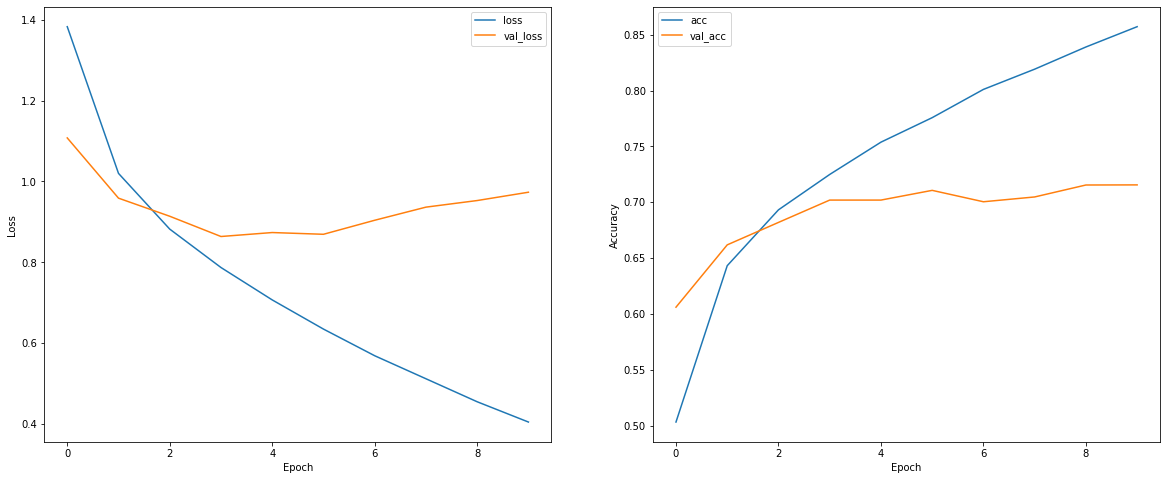

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

10000/10000 - 1s - loss: 0.9734 - accuracy: 0.7155
Accuracy: 71.55%


## CNN on Small Dataset: Cats and Dogs

### Import the data

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


### Image Generator

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 


In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualize the raw images 

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

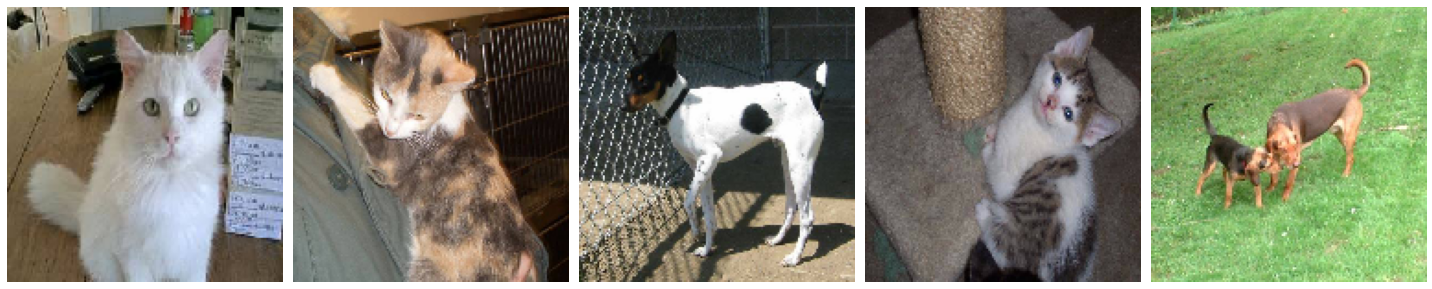

In [0]:
plotImages(sample_training_images[:5])

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])



### Train the Model

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 8s 537ms/step - loss: 0.9085 - acc: 0.5101 - val_loss: 0.6892 - val_acc: 0.5681
Epoch 2/15
15/15 [==============================] - 8s 530ms/step - loss: 0.6850 - acc: 0.5328 - val_loss: 0.6668 - val_acc: 0.6473
Epoch 3/15
15/15 [==============================] - 8s 518ms/step - loss: 0.6615 - acc: 0.5680 - val_loss: 0.6589 - val_acc: 0.5636
Epoch 4/15
15/15 [==============================] - 8s 517ms/step - loss: 0.6229 - acc: 0.6544 - val_loss: 0.6071 - val_acc: 0.6596
Epoch 5/15
15/15 [==============================] - 7s 499ms/step - loss: 0.5600 - acc: 0.7062 - val_loss: 0.5811 - val_acc: 0.6987
Epoch 6/15
15/15 [==============================] - 8s 508ms/step - loss: 0.5127 - acc: 0.7427 - val_loss: 0.5810 - val_acc: 0.6931
Epoch 7/15
15/15 [==============================] - 8s 505ms/step - loss: 0.4675 - acc: 0.7826 - val_loss: 0.5813 - val_acc: 0.7210
Epoch 8/15
15/15 [==============================] - 7s 477ms/step - loss: 0.

### Evaluate the Model

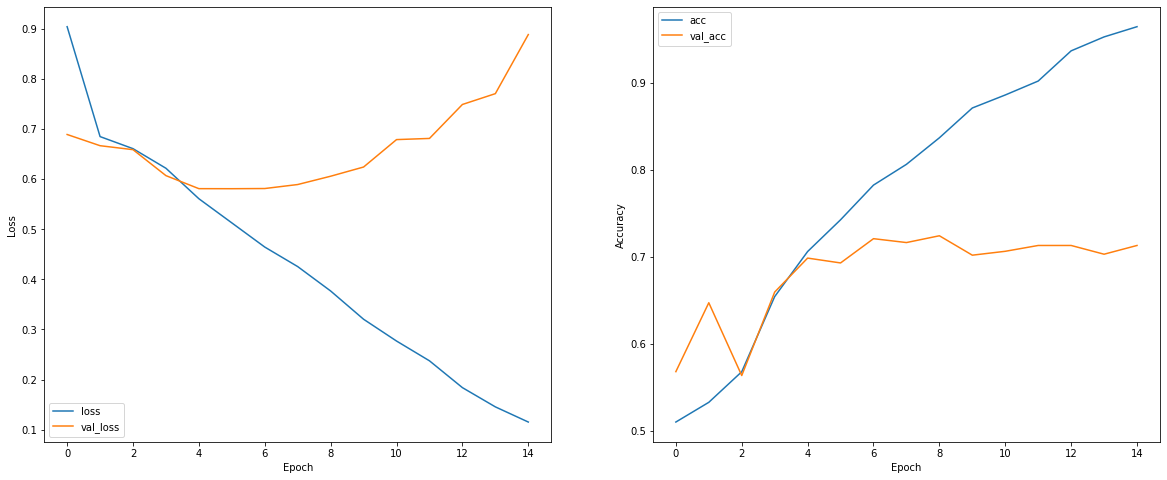

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Data Augmentation

#### Flipping

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [0]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

#### Rotation

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [0]:
plotImages(augmented_images)

#### Zoom

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [0]:
plotImages(augmented_images)

### Applying Data Augumentation

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [0]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

### Build the Model

In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',  input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.5),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [0]:
model_new.summary()

### Train the Model

In [0]:
model_new.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

### Evalaute the Model

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Ex: CNN with Dropout

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 175us/sample - loss: 1.5457 - acc: 0.4389 - val_loss: 1.2596 - val_acc: 0.5598
Epoch 2/10
50000/50000 [==============================] - 8s 163us/sample - loss: 1.2404 - acc: 0.5569 - val_loss: 1.1435 - val_acc: 0.6008
Epoch 3/10
50000/50000 [==============================] - 8s 165us/sample - loss: 1.1270 - acc: 0.5983 - val_loss: 1.0176 - val_acc: 0.6446
Epoch 4/10
50000/50000 [==============================] - 8s 164us/sample - loss: 1.0600 - acc: 0.6222 - val_loss: 0.9704 - val_acc: 0.6686
Epoch 5/10
50000/50000 [==============================] - 8s 162us/sample - loss: 1.0092 - acc: 0.6423 - val_loss: 0.9223 - val_acc: 0.6809
Epoch 6/10
50000/50000 [==============================] - 8s 160us/sample - loss: 0.9692 - acc: 0.6556 - val_loss: 0.9852 - val_acc: 0.6564
Epoch 7/10
50000/50000 [==============================] - 8s 161us/sample - loss: 0.9318 - acc: 0.6694 - val_l

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

KeyError: ignored

# Topic 7 Recurrent Neural Network (RNN)

## Text Classifcaiton With RNN

### Load the IMDB dataset

In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 20000
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow. keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

### Train the Model

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=15,validation_data=(x_test, y_test))


### Evaluate the Model

In [0]:
score, acc = model.evaluate(x_test, y_test,batch_size=batch_size)
score, acc

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Ex: RNN on MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(32, activation='relu',input_shape=(28,28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Stack RNN Architecture

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(32, activation='relu',input_shape=(28,28),return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Bidirectional RNN Architecuture

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = Sequential([
    Bidirectional(LSTM(32, activation='relu',input_shape=(28,28))),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Topic 8 Transfer Learning & Tensorflow Hub

## Fine Tuning

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow. keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [0]:
base_model=MobileNet(weights='imagenet',include_top=False) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(1,activation='sigmoid')(x) 

model=Model(inputs=base_model.input,outputs=preds)

In [0]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    ) 

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

NameError: ignored

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs
)

NameError: ignored

#### Test the Dog Image

In [0]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image.jpg','https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((150,150))
img

In [0]:
img = np.array(img)/255.0
img.shape

In [0]:
result = model.predict(img[np.newaxis, ...])
result
# round(result[0][0])

#### Test the Cat Image

In [0]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image4.jpg','https://images.all-free-download.com/images/graphicthumb/cat_with_green_eyes_194623.jpg')
img = Image.open(img).resize((150,150))
img

In [0]:
img = np.array(img)/255.0

In [0]:
result = model.predict(img[np.newaxis, ...])
round(result[0][0])

## Tenssorflow Hub

In [0]:
import tensorflow_hub as hub

In [0]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" 

In [0]:
classifier = tf.keras.Sequential([hub.KerasLayer(classifier_url, input_shape=(224,224,3))])

In [0]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image.jpg','https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((224,224))
img

In [0]:
img = np.array(img)/255.0
img.shape

In [0]:
result = classifier.predict(img[np.newaxis, ...])

In [0]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

In [0]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [0]:
plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [0]:
# Tensorflow Board
%load_ext tensorboard
%tensorboard --logdir mylogdir
#tensorboard_callback = tf.keras.callbacks.TensorBoard(mylogdir, histogram_freq=1)

# (Optional) Topic 9 Functional API

## Sequential Model as Function

### MNIST data

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
def nn_model():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [0]:
model = nn_model()
model.summary()

### Fashion MNIST data

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
model = nn_model()
model.summary()

In [0]:
history = model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

In [0]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Exercise

In [0]:
def nn_model(lr):
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(lr)
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

lr = [0.001,0.01,0.1]
acc=[]
for i in lr:
    model = nn_model(i)
    model.fit(x_train,y_train,verbose=0)
    loss,accuracy = model.evaluate(x_test,y_test)
    acc.append(accuracy)


In [0]:
import matplotlib.pyplot as plt

plt.semilogx(lr,acc)
plt.semilogx(lr,acc,'o')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.show()

## Layers as Function

In [0]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [0]:
model.summary()

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.RMSprop(),metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_data=(x_test,y_test))
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

In [0]:
model.save('model.h5')
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model('model.h5')

###Ensembling with Nested Models

In [0]:
from tensorflow.keras import layers

def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

In [0]:
keras.utils.plot_model(ensemble_model, 'model.png')
# keras.utils.plot_model(model, 'model.png', show_shapes=True)


### Autoencoder

In [0]:
from tensorflow.keras import layers 
encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

In [0]:
keras.utils.plot_model(autoencoder, 'model.png')
# keras.utils.plot_model(model, 'model.png', show_shapes=True)

### Toy Resnet

In [0]:
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name='toy_resnet')
model.summary()

In [0]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(x_train, y_train,
          batch_size=64,
          epochs=1,
          validation_split=0.2)

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

### Multiple Inputs and Outputs

In [0]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(shape=(None,), name='title')  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name='body')  # Variable-length sequence of ints
tags_input = keras.Input(shape=(num_tags,), name='tags')  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, activation='softmax', name='department')(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

In [0]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

## Ex: Funcational API

In [0]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3), name='img')

x = layers.Conv2D(32,(3,3), activation='relu',padding='same')(inputs)
x = layers.Conv2D(64,(3,3), activation='relu',padding='same')(x)
y1 = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(16,(3,3), activation='relu',padding='same')(inputs)
x = layers.Conv2D(32,(3,3), activation='relu',padding='same')(x)
x = layers.Conv2D(64,(3,3), activation='relu',padding='same')(x)
y2 = layers.MaxPooling2D((2,2))(x)

y3 = layers.concatenate([y1, y2])
y4 = layers.Flatten()(y3)
y5 = layers.Dense(128,activation='softmax')(y4)
outputs = layers.Dense(10,activation='softmax')(y5)

model = keras.Model(inputs, outputs, name='dual_cnn')

In [0]:
# keras.utils.plot_model(model, 'model.png')
keras.utils.plot_model(model, 'model.png', show_shapes=True)

# (Optional) Topic 10 TF.Data

In [0]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [0]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [0]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()